In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plot_helper import axline, plot_linear_svc_2d, plot_svm_decision_margin_2d

# 支持向量机（Support Vector Machines）

SVM出发点是非常直观的，那就是把二分类问题放到几何上理解：
> 我们希望找到这样一个决策边界，这个边界距离两类数据点最远。将最接近这边界的数据点定义为支持向量，我们将二分类问题转换为找到这样一个直线（多维叫超平面），它与支持向量有最大的间隔。



<TABLE>
<TR>
    <TD style="padding: 1em">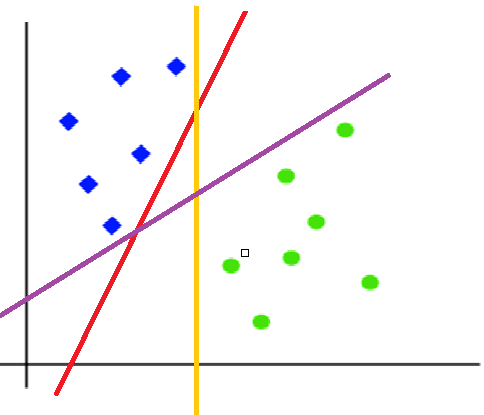</TD>
    <TD style="padding: 1em">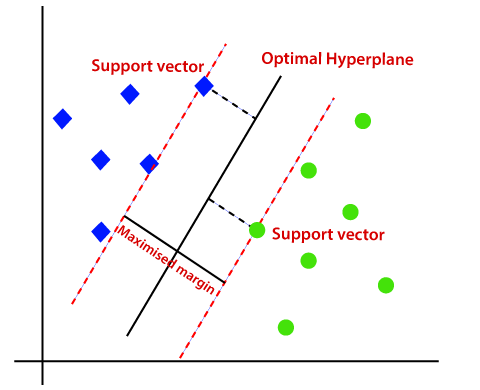</TD>
</TR>
</TABLE>



假设二分类问题的间隔线（或超平面）是 $w \cdot x + b = 0$，支持向量落在间隔区间边界线$w \cdot x + b = \pm 1 $上。


<CENTER>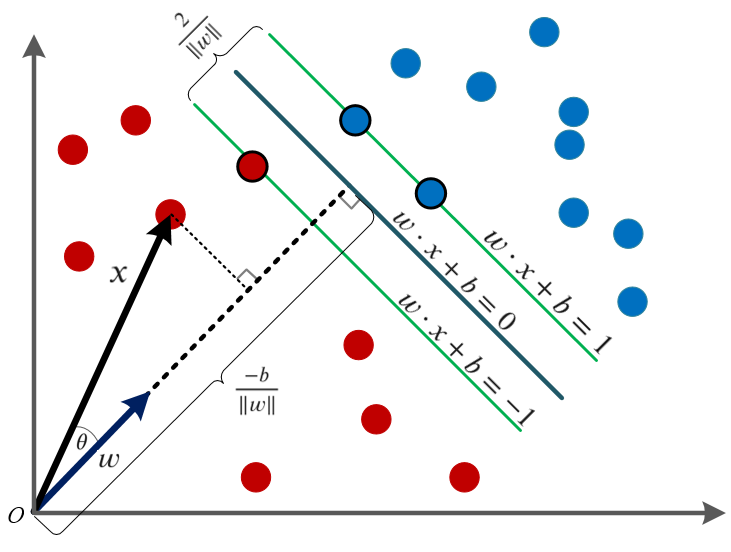</CENTER>

> $w \cdot x$是$w$和$x$两个向量额点乘， $w\cdot x = \left\Vert w \right\Vert \left\Vert x \right\Vert \cos\theta $，向量$x$投影到向量$w$上的长度与向量$w$长度的乘积。

假设样本$\{(x_i, y_i)\}$，与用0和1表示二分类其它分类器不同，SVM为了建模方便采用$+1$和$-1$表示二分类，即样本分类目标$y_i$可取值$+1$和$-1$。
目标是寻找最大间隔，即$\displaystyle \max_{w,b} \frac{2}{\Vert w\Vert}$, 转换为最小问题，
$\displaystyle \min_{w,b} \frac{1}{2}\Vert w\Vert$。最优化问题:

$$
\begin{aligned}
& \min_ {w, b} \frac{1}{2} w^T w \\
\textrm{s. t. }\quad\quad
& y_i (w^T x_i + b) \geq 1
\end{aligned}
$$

对于上式约束条件，$y_i (w^T x_i + b) \geq 1$，当$y_i=1$时，$w^T x_i + b \geq 1$，当$y_i=-1$是$w^T x_i + b \leq -1$。

In [4]:
import numpy as np
from sklearn.svm import SVC

positive_x = [[2,7],[8,3],[7,5],[4,4],[4,6],[1,3],[2,5]]
negative_x = [[8,7],[4,10],[9,7],[7,10],[9,6],[4,8],[10,10]]
X = np.vstack((positive_x, negative_x))
y = np.hstack((np.ones(len(positive_x)), -1*np.ones(len(negative_x))))


model = SVC(kernel="linear", C=100000, random_state=0)
model.fit(X, y)

w, b =  model.coef_[0], model.intercept_[0]

print(f"分割线: w = {w}, b = {b}")


分割线: w = [-0.44430022 -1.11096689], b = 9.664935953968993


分割线: w = [-0.44430022 -1.11096689], b = 9.664935953968993
sv1 margin:  1.0000 
sv2 margin: -1.0000 
原点到分割线的距离:  1.6715


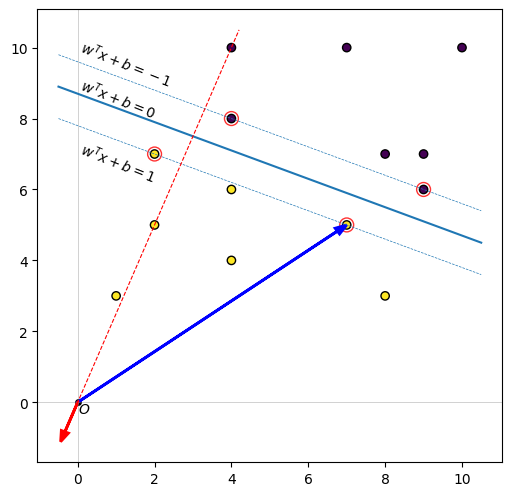

In [8]:
fig, ax = plt.subplots(figsize=(6,6), dpi=100)
ax.axhline(0, c="grey", alpha=0.5, lw=0.5); ax.axvline(0, c="grey", alpha=0.5, lw=0.5)


tol = 1e-4

plot_linear_svc_2d(model, X, y, ax=ax, tol=tol)

axline(ax, (0,0), slope=model.coef_[0][1]/model.coef_[0][0], c="red", lw=0.8, ls="--")

supp_vecs = X[np.where(np.abs(model.decision_function(X)) <= 1 + tol)[0]]
supp_vec = supp_vecs[1]

ax.scatter(0, 0, s=15, c="black")
ax.scatter(w[0], w[1], c="white")
ax.arrow(0, 0, supp_vec[0], supp_vec[1], length_includes_head=True, 
         head_width=0.2, head_length=0.3, fc='blue', ec='blue', lw=2)
ax.arrow(0, 0, w[0], w[1], length_includes_head=True,
         head_width=0.2, head_length=0.3, fc='red', ec='red', lw=2)


line_angle = np.arctan(-w[0]/w[1]) / np.pi*180
ax.text(0, 9.8, "$w^T x + b = -1$", ha="left", va="bottom", rotation=line_angle,  rotation_mode='anchor')
ax.text(0, 8, "$w^T x + b = 0 $", ha="left", rotation=line_angle)
ax.text(0, 6.2, "$w^T x + b = 1 $", rotation=line_angle);
ax.text(0, 0, "$O$", ha="left", va="top")

print(f"sv1 margin: {w @ supp_vecs[1] + b : .4f} ")
print(f"sv2 margin: {w @ supp_vecs[3] + b : .4f} ")
print(f"原点到分割线的距离: {2/np.linalg.norm(w) : .4f}")

# 2.软间隔(soft margin)

通常情况，二分类间隔边界是模糊的，无法用一条间隔线划分出两类。


为此，在边界线上引入松弛变量$\zeta_i$，放松边界线的要求，模型定义为
$$
\begin{aligned}
& \min_ {w, b, \zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i\\
\textrm{subject to }\quad \\
& y_i (w^T x_i + b) \geq 1 - \zeta_i,\\
& \zeta_i \geq 0, i=1, ..., n
\end{aligned}
$$

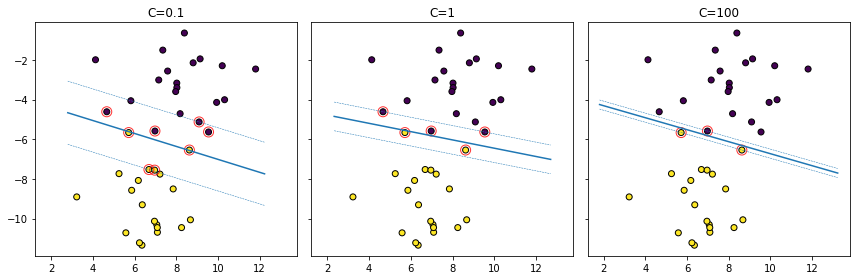

In [4]:
# import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, cluster_std=1.5, random_state=6)

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)
for i, C in enumerate([0.1, 1, 100]):
    model = SVC(kernel="linear", C=C, random_state=42)
    model.fit(X, y)
    
    ax = axes[i]    
    plot_linear_svc_2d(model, X, y, ax=ax, tol=1e-5)
    ax.set_title("C=" + str(C))
    
plt.tight_layout()

# 3. 非线性分类问题


例如，下面两类数据，很难用一条直线将这两类样本区别开

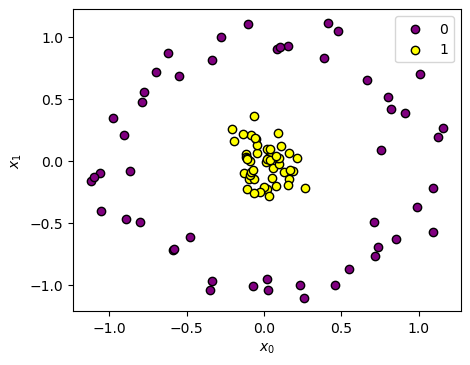

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(factor=0.15, random_state=11, noise=0.1)

plt.figure(figsize=(5, 4), dpi=100)
plt.scatter(X[y==0,0], X[y==0,1], ec="k", c="purple", label="0")
plt.scatter(X[y==1,0], X[y==1,1], ec="k", c="yellow", label="1")
plt.xlabel("$x_0$"); plt.ylabel("$x_1$")
plt.legend()
plt.show()

强行使用线性SVM模型虽然也会得到一个分类模型，但是结果与期望有很大的差距。

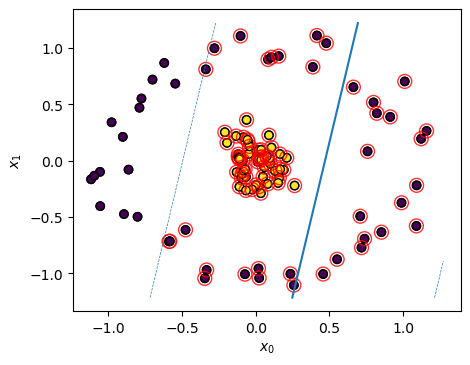

In [7]:
from sklearn.svm import SVC
model = SVC(kernel="linear")
model.fit(X, y)

plt.figure(figsize=(5, 4), dpi=100)
plt.scatter(X[:,0], X[:,1], c = y, ec="k")
plt.xlabel("$x_0$"); plt.ylabel("$x_1$");

from plot_helper import plot_linear_svc_2d
plot_linear_svc_2d(model, X, y, ax=plt.gca(), tol=1e-5)

非线性的问题投射到高维空间下可以转换成线性的问题。

例如，我们将二维的样本数据$(x_0, x_1)$，投射到三维空间，得到$(x_0, x_1, x_1^2+x_2^2)$。

In [40]:
X_new = np.hstack([X, (X**2).sum(axis=1).reshape(-1,1)]) 

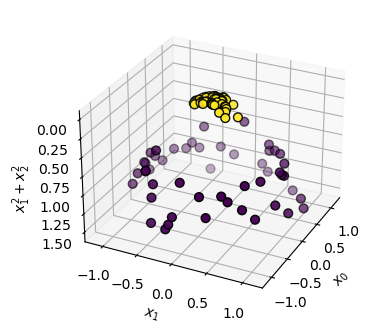

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 4), dpi=100)

ax = fig.add_subplot(projection='3d', elev=-152, azim=-26)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, s=40, edgecolor='k')
ax.set_xlabel("$x_0$"); ax.set_ylabel("$x_1$")
ax.zaxis.set_rotate_label(False)
ax.set_zlabel("$x_{1}^{2}+x_{2}^{2}$", rotation=90);

In [42]:
linear_svm_3d = SVC(kernel="linear", C=10000)
linear_svm_3d.fit(X_new, y)

w, b = linear_svm_3d.coef_[0], linear_svm_3d.intercept_[0]

print("w = ", w, " b = ", b)

w =  [-0.11279427  0.06444605 -4.2313874 ]  b =  1.542999725078516


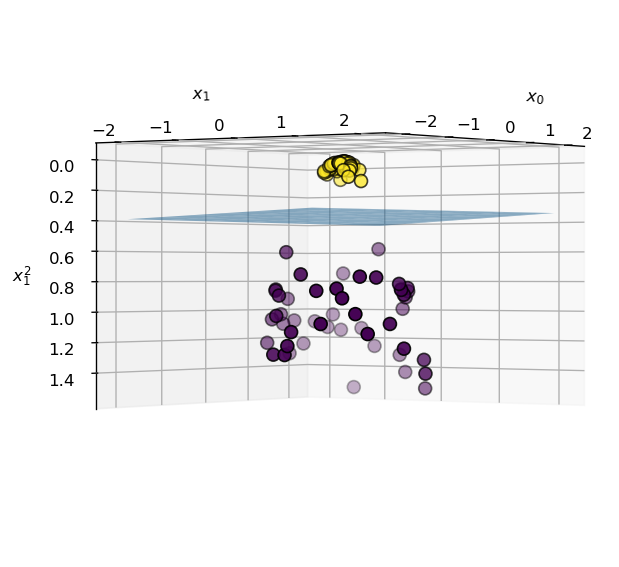

In [43]:
fig = plt.figure(figsize=(8, 6), dpi=120)

# ax = Axes3D(figure, elev=180, azim=-36)
ax = fig.add_subplot(projection='3d', elev=-180, azim=-36)

xx = np.linspace(X_new[:, 0].min() - 1, X_new[:, 0].max() + 1, 50)
yy = np.linspace(X_new[:, 1].min() - 1, X_new[:, 1].max() + 1, 50)
XX, YY = np.meshgrid(xx, yy)

ZZ = (w[0] * XX + w[1] * YY + b) / -w[2] # 绘制分割平面
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.5)

ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, s=60, ec='k')

ax.set_xlabel("$x_0$"); ax.set_ylabel("$x_1$")
ax.zaxis.set_rotate_label(False)  # disable automatic rotation for lalbel text
ax.set_zlabel("$x_{1}^{2}$")

plt.show()

将3维结果再投射回2维空间

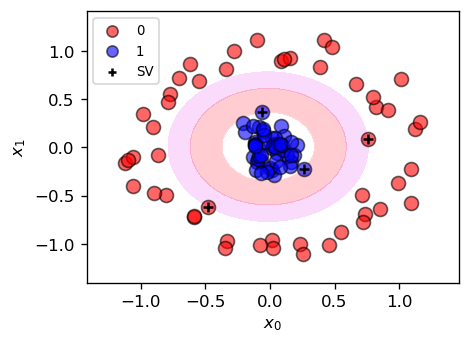

In [50]:
eps = 0.3
xx = np.linspace(X_new[:, 0].min() - eps, X_new[:, 0].max() + eps, 50)
yy = np.linspace(X_new[:, 1].min() - eps, X_new[:, 1].max() + eps, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = XX**2 + YY**2

plt.figure(figsize=(4,3), dpi=120)

decision_values = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]).reshape(XX.shape)
contour_levels = [decision_values.min(), -1, 0, 1, decision_values.max()]
plt.contourf(XX, YY, decision_values, levels=contour_levels, 
            colors=["#ffffff", "#e84feef2", "#ff0022ff", "#ffffff"],  alpha=0.2)

plt.scatter(X[y==0, 0], X[y==0, 1], ec='k', c="r", alpha=0.6, s=70, label=0)
plt.scatter(X[y==1, 0], X[y==1, 1], ec='k', c="b", alpha=0.6, s=70, label=1)
plt.scatter(X[linear_svm_3d.support_, 0], X[linear_svm_3d.support_, 1], marker="+", c="k", label="SV")

plt.xlabel("$x_0$"); plt.ylabel("$x_1$")
plt.legend(fontsize=8, markerscale=0.8);

上例中，我们将二维的样本数据$(x_0, x_1)$，投射到三维空间，$(x_0, x_1, x_1^2+x_2^2)$，这个过程不妨定义函数$\varphi$进行高维变换:
$$
\varphi \colon\quad (x_0, x_1) \longrightarrow (x_0, x_1, x_1^2+x_2^2)
$$

<center>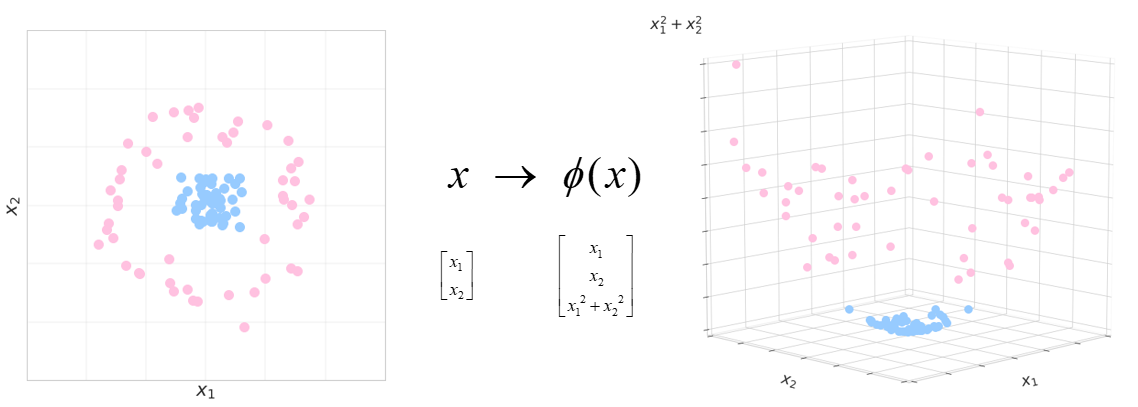</center>

转换到高维之后，分类问题也就转化成在高维求解该间隔超平面$w^Tx+b=0$的问题。


假定二分类问题的$n$个训练样本的数据向量$x_i \in \mathbb{R}^p$，$i=1,\dots,n$，以及训练样本的分类目标或标签向量$y \in \{1, -1\}^n$

$$
\begin{aligned}&\min_ {w, b, \zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i\\
\textrm {subject to }\quad 
& y_i \left(w^T \phi (x_i) + b \right) \geq 1 - \zeta_i,\\
& \zeta_i \geq 0, i=1, ..., n\end{aligned}
$$

如果维度非常高，也有可能是无穷维的空间，上面的优化问题尽管理论上存在解，但在现实计算中却很难求解。幸运的是，该优化问题对偶于下面的优化问题，也就是解决下面优化问题，也就解决上面的优化问题。
$$
\begin{aligned}
& \max_{\alpha} e^T \alpha - \frac{1}{2} \alpha^T Q \alpha \\
\textrm {subject to }\quad
& y^T \alpha = 0\\
& 0 \leq \alpha_i \leq C, i=1, ..., n
\end{aligned}
$$

其中，$e$为分量全为$1$的向量，$C>0$为上确界值，半正定矩阵$Q_{ij} \equiv y_i y_j K(x_i, x_j)$，$K(x_i, x_j) = \phi (x_i)^T \phi (x_j)$为核函数。 

求解得到决策向量$z$是否为某个类别的决策函数
$$ z \mapsto 
\operatorname {sgn}(w \cdot \varphi (z)+ \rho)
=\operatorname {sgn} \left(\left[\sum _{i=1}^{n}y_{i}\alpha_{i}K(x_i,z)\right] + \rho \right) 
$$
其中
$$
\begin{aligned}
\rho={w}\cdot \varphi ({x}_{i})-y_{i}
&=\left[\sum _{k=1}^{n}\alpha_{k}y_{k} \varphi(x_k) \cdot \varphi (x_i) \right] - y_i \\
&=\left[\sum _{k=1}^{n}\alpha_{k}y_{k} K(x_k, x_i)\right]-y_{i}
\end{aligned}
$$

这里，我们仅需要引入这种称之为核函数(kernel function)的计算技巧，构造特定的核函数就能够在将数据投射到高维空间后依然可以以线性的方法解决该优化问题。

#### 常见的核函数包括：

* **线性核** $K(x, x') = \langle x, x'\rangle$
* **多项式核** $$K(x, x')=(\gamma \langle x, x'\rangle + r)^d$$
    > $d$为SVC类的参数`degree`, $\gamma$参数`gamma`, $r$为参数`coef0`.
* **高斯径向基函数核**(Radial basis function kernel, RBF) 
$$K(x, x')=\exp \left(-\gamma {\| x-x' \| }^2 \right)$$
有时$\gamma$也用$\frac{1}{2\sigma ^{2}}$表示, 即$K(x, x')=\exp \left(-\frac{{\| x-x' \| }^2}{2\sigma ^{2} } \right)$。
* **Sigmoid核** $$ K(x, x') = \tanh(\gamma \langle x,x'\rangle + r)$$
    >  $\gamma$为SVC类的参数`gamma`, $r$为参数`coef0`

显然，在上面圆环内外分类的例子中，可以直接采用`degree=2`的多项式核的支持向量机模型，而无需前面繁琐的变换计算。

## 直接使用2阶多项式核`poly`

In [5]:
from sklearn.svm import SVC

model_svm_poly = SVC(kernel='poly', degree=2)
model_svm_poly.fit(X, y)

from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y, model_svm_poly.predict(X) ) :.2f}")

Accuracy: 1.00


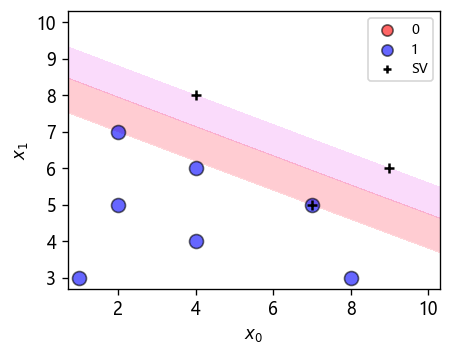

In [6]:
from plot_helper import plot_svm_decision_margin_2d

plt.figure(figsize=(4, 3), dpi=120)
plot_svm_decision_margin_2d(model_svm_poly, X, eps=0.3, ax=plt.gca())

plt.scatter(X[y==0, 0], X[y==0, 1], ec='k', c="r", alpha=0.6, s=70, label=0)
plt.scatter(X[y==1, 0], X[y==1, 1], ec='k', c="b", alpha=0.6, s=70, label=1)
plt.scatter(X[model_svm_poly.support_, 0], X[model_svm_poly.support_, 1], marker="+", c="k", label="SV")

plt.xlabel("$x_0$"); plt.ylabel("$x_1$")
plt.legend(fontsize=8, markerscale=0.8, )

> sklearn的`SVC`对象拟合结果，属性`dual_coef_`是$y_i \alpha_i$的计算值，属性`intercept_`是$\rho$的计算值，`support_vectors_`包含所有的支持向量。


# 4. 高斯径向基函数核(RBF)

### 调整基于RBF核函数的支持向量机参数

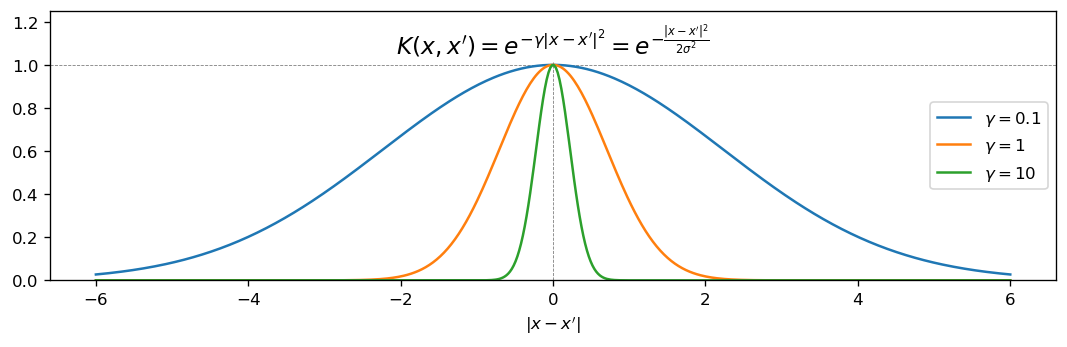

In [105]:
d = np.linspace(-6, 6, 500)
plt.figure(figsize=(9,3), dpi=120)
plt.axhline(1, c="grey", ls="--", lw=0.5)
plt.axvline(0, ymax=0.81, c="grey", ls="--", lw=0.5)
plt.axhline(0, c="black", ls="--", lw=0.5)

plt.plot(d, np.exp(-0.1*d**2), label="$\gamma=0.1$")
plt.plot(d, np.exp(-d**2), label="$\gamma=1$")
plt.plot(d, np.exp(-10*d**2), label="$\gamma=10$")
plt.text(0, 1.05, r"$K(x, x')=e^{-\gamma {\| x-x' \| }^2} = e^{-\frac{{\| x-x' \| }^2}{2\sigma ^{2} } }$",
        fontsize=14, ha="center")
plt.ylim(0, 1.25);  plt.xlabel("$\|x-x'\|$"); plt.legend();
plt.tight_layout()

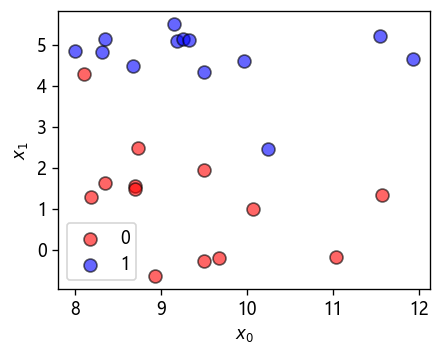

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=4, n_samples=30)
y[np.array([7, 27])] = 0
mask = np.ones(len(X), dtype=bool)
mask[np.array([0, 1, 5, 26])] = 0
X, y = X[mask], y[mask]

plt.figure(figsize=(4,3), dpi=120)
plt.scatter(X[y==0,0], X[y==0,1], ec="k", marker="o", c="red", alpha=0.6, s=60, label=0)
plt.scatter(X[y==1,0], X[y==1,1], ec="k", marker="o", c="blue", alpha=0.6, s=60, label=1)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend();

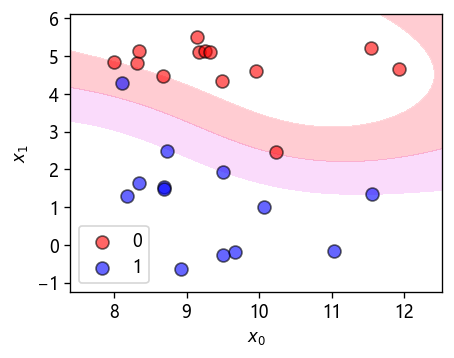

In [8]:
from sklearn.svm import SVC
from plot_helper import plot_svm_decision_margin_2d

model = SVC(kernel='rbf', C=10, gamma=0.1)
model.fit(X, y)

plt.figure(figsize=(4,3), dpi=120)
plot_svm_decision_margin_2d(model, X, eps=0.6, ax=plt.gca())
plt.scatter(X[y==1, 0], X[y==1,1], ec="k", marker="o", c="red", alpha=0.6, s=60, label=0)
plt.scatter(X[y==0, 0], X[y==0,1], ec="k", marker="o", c="blue", alpha=0.6, s=60, label=1)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend();

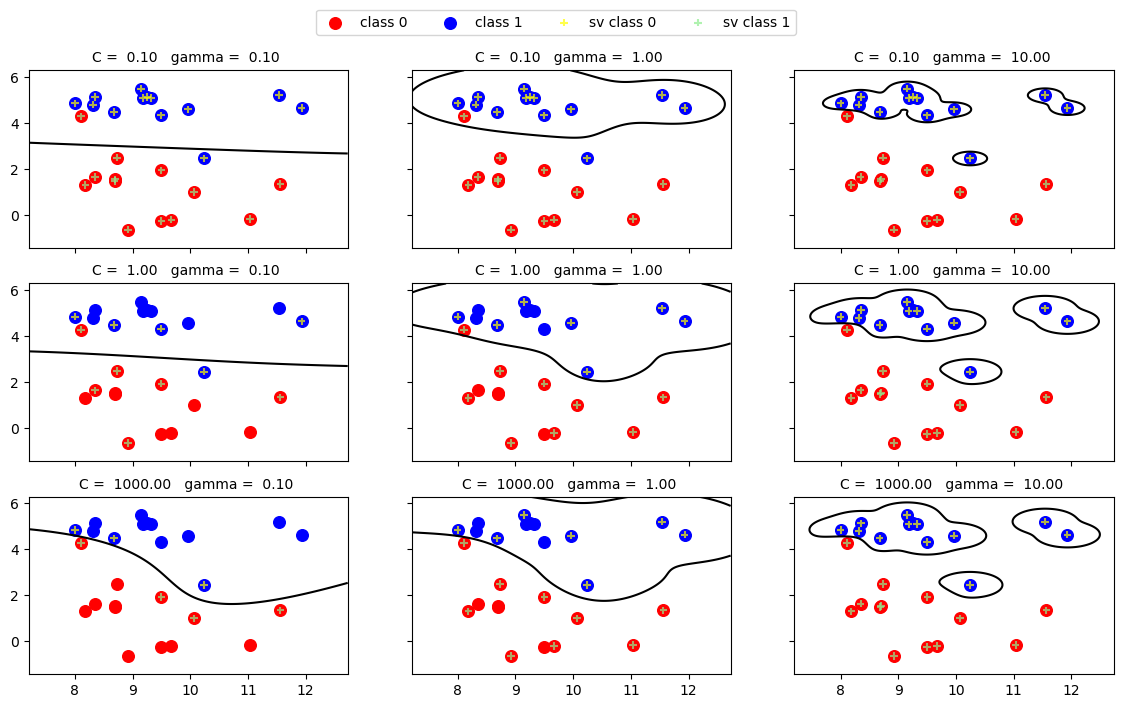

In [129]:
from plot_helper import plot_2d_separator
def plot_svm(X, y, log_C, log_gamma, ax=None):
    C = 10. ** log_C
    gamma = 10. ** log_gamma
    svm = SVC(kernel='rbf', C=C, gamma=gamma).fit(X, y)
    if ax is None:
        ax = plt.gca()
    
    plot_2d_separator(svm, X, ax=ax, eps=0.8)
    ax.scatter(X[y==0, 0], X[y==0, 1], c="red", s=70)
    ax.scatter(X[y==1, 0], X[y==1, 1], c="blue", s=70)

    sv = svm.support_vectors_
    sv_labels = svm.dual_coef_.ravel() > 0 # 对偶系数符号确定样本标签
    ax.scatter(sv[sv_labels,0], sv[sv_labels,1], marker="+", ec="yellow", fc="none", alpha=0.7, s=30)
    ax.scatter(sv[~sv_labels,0], sv[~sv_labels,1], marker="+", ec="lightgreen", fc="none", alpha=0.7, s=30)

    ax.set_title(f"C = {C: 0.2f}   gamma = {gamma: .2f} ", fontsize=10)


fig, axes = plt.subplots(3, 3, figsize=(14, 8), dpi=100, sharex=True, sharey=True)
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        plot_svm(X, y, log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2));


#### 参数`C`和参数`gamma`如何取值？

参数`C`作为一种“惩罚”系数，即对跨越边界的宽容度。`C`越高越不能容忍出现跨边界的现象。这里所谓的“容忍”就是在下面最小化目标的作用下，边界松弛$\zeta$变量和参数$C$是一种“互相顶牛”的作用关系，前者大后者小，后者大前者小。
当`C`越大，边界允许的松弛越小，边界越是分明，必须“绕弯”才能做到分开，使得模型表达变得复杂，泛化能力变差，容易过拟合。
当`C`越小，边界允许的松弛越大，边界变得模糊，走直线就可以达到学习目标，模型学习能力变简单，泛化能力变强，容易欠拟合。
$$
\begin{aligned}&\min_ {w, b, \zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i\\
\textrm {subject to }\quad 
& y_i (w^T \phi (x_i) + b) \geq 1 - \zeta_i,\\
& \zeta_i \geq 0, i=1, ..., n\end{aligned}
$$

参数`gamma`是高斯核函数或径向基核函数（RBF）所必须的一个参数，高斯核本质上是将样本投射到无穷高维的特征空间中进行分割划分，
下面高斯核表示两样本在无穷高维空间中向量内积，反应了两个样本“相近”的程度
$$
K(x, x')=\phi(x)^T\phi(x') = e^{-\gamma {\| x-x' \| }^2} = e^{-\frac{{\| x-x' \| }^2}{2\sigma ^{2} } }
$$

参数`gamma`是上式中的$\gamma$。假如比较两个样本相近程度，当参数`gamma`越大，$\sigma$就越小，反映“相近”程度的钟型曲线就又高又瘦，原本两个样本表现也就越相近；当参数`gamma`越小时，$\sigma$就越大，反映“相近”程度的钟型曲线就又矮又胖，原本两个样本相近程度表现越小。

$$
\hat{y} = w^T \phi(x) + b =  \sum_{j=1}^{m} \alpha_j y^{(j)} K(x^{(j)}, x) + b 
$$


在支持向量机中，间隔边界由支持向量定义。当`gamma`变大，$\sigma$变小，支持向量的作用范围变小，由支持向量确定的边界范围也就变小。例如在上图看到，`gamma=10`边界圈定的范围比`gamma=1`要小，圈定边界的支持向量变少，支持向量越少，边界越容易受到个别样本影响，模型也具有更复杂的学习能力，泛化能力变差。反之，当`gamma`变小，$\sigma$变大，由支持向量确定的边界范围也就变大，也需更多的支持向量确定，不容易受到个别样本影响，模型学习能力变简单，泛化能变强。


总之，过高的参数`gamma`或者过高的参数`C`，如果产生更少的支持向量确定的边界，模型泛化能力变弱，那么就可能会引起过拟合现象；反之，过低的参数`gamma`或者过低的参数`C`，使得更多的支持向量确定边界，导致模型泛化能力过强，而模型学习能力变得过于简单，那么就可能引起欠拟合现象。

# 实例: 肿瘤识别良性还是恶性 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

采用`sklearn`里的`scale`计算方法计算的默认的`gamma`取值

In [18]:
X_train.shape

(426, 30)

In [5]:
1 / (X_train.shape[1] * X_train.var())

np.float64(6.230110167929162e-07)

In [6]:
from sklearn.svm import SVC

model = SVC(kernel="rbf", C=1, gamma=0.0000006)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

pred_train = model.predict(X_train)
pred_test  = model.predict(X_test)

print(f"Accuracy on training set: {accuracy_score(y_train, pred_train ) :.2f}")
print(f"Accuracy on test set: {accuracy_score(y_test, pred_test ) :.2f}")

Accuracy on training set: 0.90
Accuracy on test set: 0.94


看一下数据各特征的数据分布情况

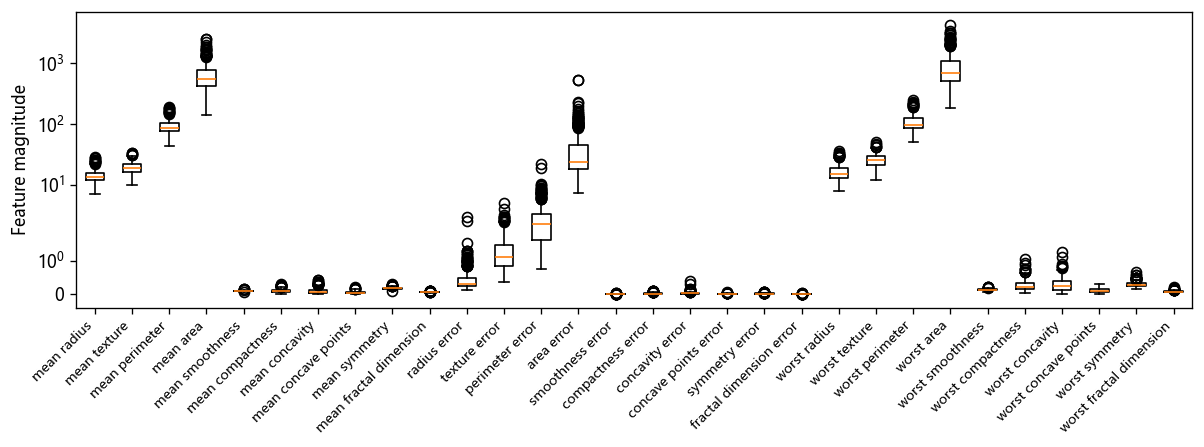

In [21]:
plt.figure(figsize=(12, 3.2), dpi=120)
plt.boxplot(X_train)
plt.yscale("symlog")
plt.xticks(range(1, len(cancer.feature_names) + 1), cancer.feature_names, 
           rotation=45, horizontalalignment='right', fontsize=8)
plt.ylabel("Feature magnitude");

由于支持向量机依赖“距离（内积）”的计算，数据各特征在尺度上有很大的差异，计算“距离”时，导致“大数”吃“小数”的情况，数较小的特征无法发挥作用。

为了避免这种影响，在使用支持向量机之前，将各个特征的尺度变换到$[0, 1]$范围内。

In [10]:
X_train - X_train.min(axis=0)

array([[4.8690e+00, 7.7500e+00, 3.1750e+01, ..., 9.1400e-02, 1.5360e-01,
        1.5030e-02],
       [4.2390e+00, 1.0150e+01, 2.8150e+01, ..., 2.0220e-02, 1.7270e-01,
        1.0180e-02],
       [1.3149e+01, 1.8540e+01, 8.7410e+01, ..., 1.6280e-01, 1.0070e-01,
        1.1330e-02],
       ...,
       [2.4550e+00, 8.6100e+00, 1.6030e+01, ..., 5.0520e-02, 8.8900e-02,
        2.6320e-02],
       [2.7390e+00, 8.5100e+00, 1.6940e+01, ..., 0.0000e+00, 3.4400e-02,
        1.0550e-02],
       [4.5290e+00, 1.4220e+01, 3.0730e+01, ..., 9.6530e-02, 5.4700e-02,
        3.2280e-02]], shape=(426, 30))

In [11]:
min_training = X_train.min(axis=0)
rng_training = X_train.max(axis=0) - X_train.min(axis=0)

X_train_scaled = (X_train - min_training) / rng_training

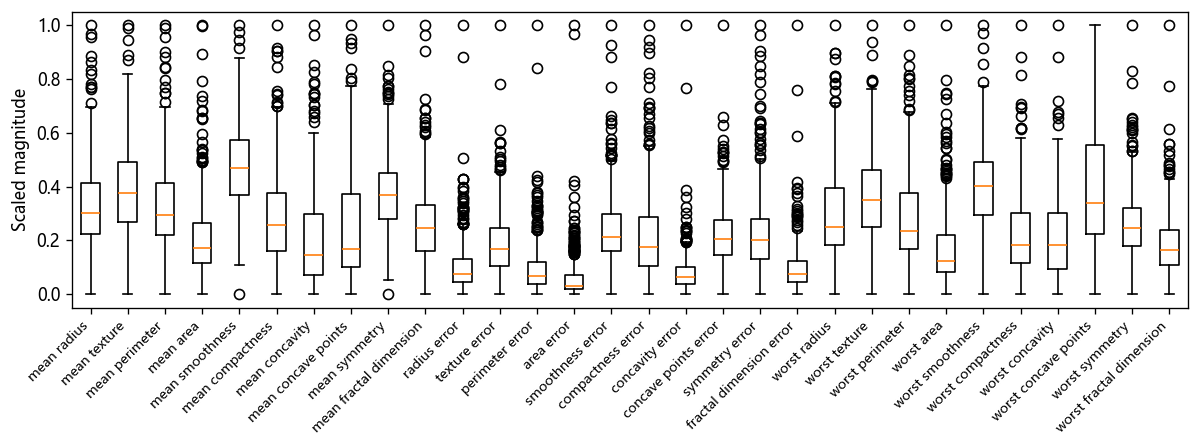

In [23]:
plt.figure(figsize=(12, 3.2), dpi=120)
plt.boxplot(X_train_scaled)
plt.xticks(range(1, len(cancer.feature_names) + 1), cancer.feature_names, 
           rotation=45, horizontalalignment='right', fontsize=8)
plt.ylabel("Scaled magnitude");

将训练集数据尺度变换后，也要对测试集数据进行**相同**的变换.

In [14]:
X_test_scaled = (X_test - min_training) / rng_training

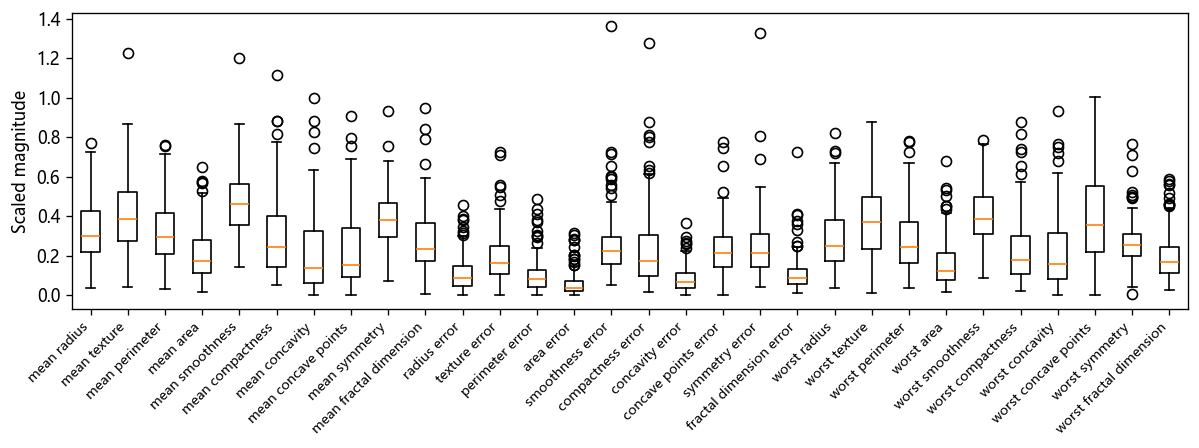

In [25]:
plt.figure(figsize=(12, 3.2), dpi=120)
plt.boxplot(X_test_scaled)
plt.xticks(range(1, len(cancer.feature_names) + 1), cancer.feature_names, 
           rotation=45, horizontalalignment='right', fontsize=8)
plt.ylabel("Scaled magnitude");

In [18]:
def plot_decision_values(model, X, y, feature_idx, feature_name, ax=None):
    if ax is None:
        ax = plt.gca()
        
    ax.axhline(1,  lw=1.5, ls="--", c="grey")
    ax.axhline(0,  lw=1.5, ls="--", c="red")
    ax.axhline(-1, lw=1.5, ls="--", c="grey")
    
    decision_values = model.decision_function(X)

    ax.scatter(X[y==0, feature_idx], decision_values[y==0], alpha=0.5, label="0")
    ax.scatter(X[y==1, feature_idx], decision_values[y==1], alpha=0.5, label="1")
    ax.set_ylabel("decision value")
    ax.set_xlabel(feature_name)
    ax.legend()

`scikit-learn`的`SVC`默认`gamma`值是 `1 / (n_features * X.var()) `

In [12]:
1/(X_train_scaled.shape[1]*X_train_scaled.var())

np.float64(1.016557013013376)

Accuracy on training set: 0.9836
    Accuracy on test set: 0.9720


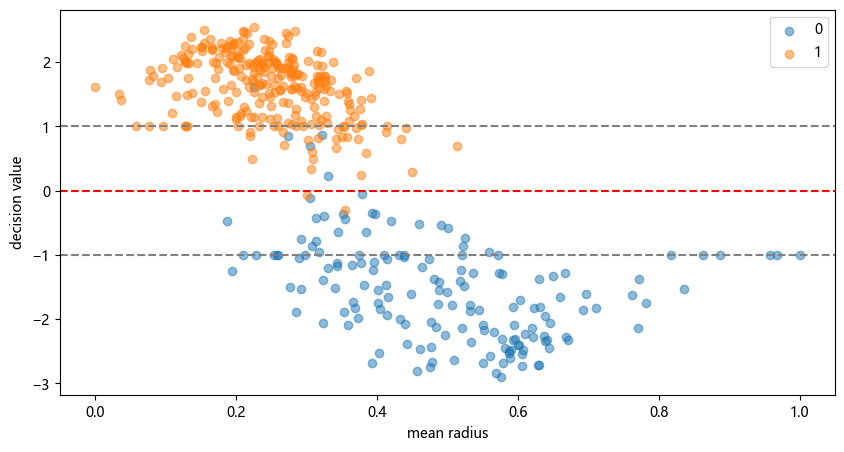

In [19]:
model1 = SVC(kernel="rbf", C=1, gamma=1)
model1.fit(X_train_scaled, y_train)

print(f"Accuracy on training set: {accuracy_score(y_train, model1.predict(X_train_scaled) ) :.4f}")
print(f"    Accuracy on test set: {accuracy_score(y_test, model1.predict(X_test_scaled) ) :.4f}")

plt.figure(figsize=(10, 5))
plot_decision_values(model1, X_train_scaled, y_train, 0, cancer.feature_names[0])

Accuracy on training set: 1.0000
    Accuracy on test set: 0.9510


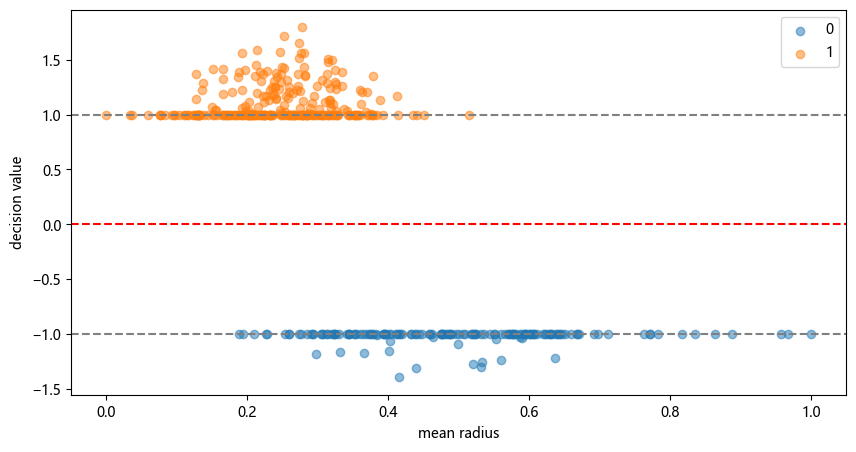

In [29]:
model2 = SVC(kernel="rbf", C=10, gamma=10)
model2.fit(X_train_scaled, y_train)

print(f"Accuracy on training set: {accuracy_score(y_train, model2.predict(X_train_scaled) ) :.4f}")
print(f"    Accuracy on test set: {accuracy_score(y_test, model2.predict(X_test_scaled) ) :.4f}")

plt.figure(figsize=(10, 5))
plot_decision_values(model2, X_train_scaled, y_train, 0, cancer.feature_names[0])

Accuracy on training set: 0.9577
    Accuracy on test set: 0.9510


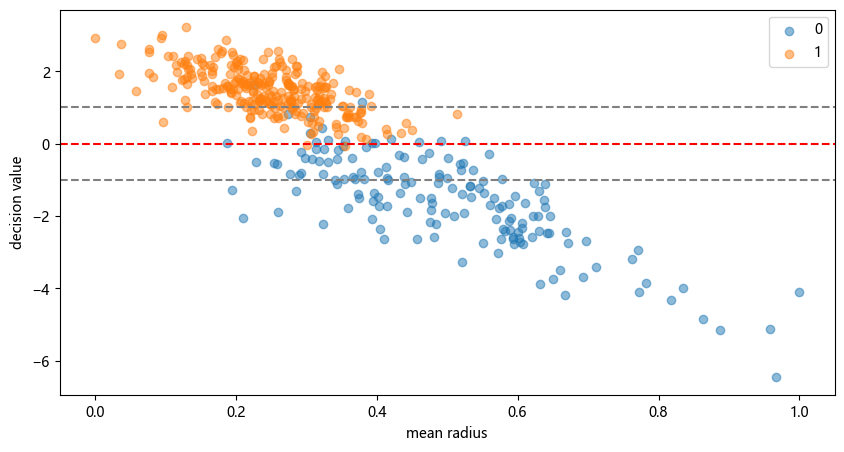

In [30]:
model3 = SVC(kernel="rbf", C=100, gamma=0.001)
model3.fit(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score

print(f"Accuracy on training set: {accuracy_score(y_train, model3.predict(X_train_scaled) ) :.4f}")
print(f"    Accuracy on test set: {accuracy_score(y_test, model3.predict(X_test_scaled) ) :.4f}")

plt.figure(figsize=(10, 5))
plot_decision_values(model3, X_train_scaled, y_train, 0, cancer.feature_names[0])

Accuracy on training set: 0.6268
    Accuracy on test set: 0.6294


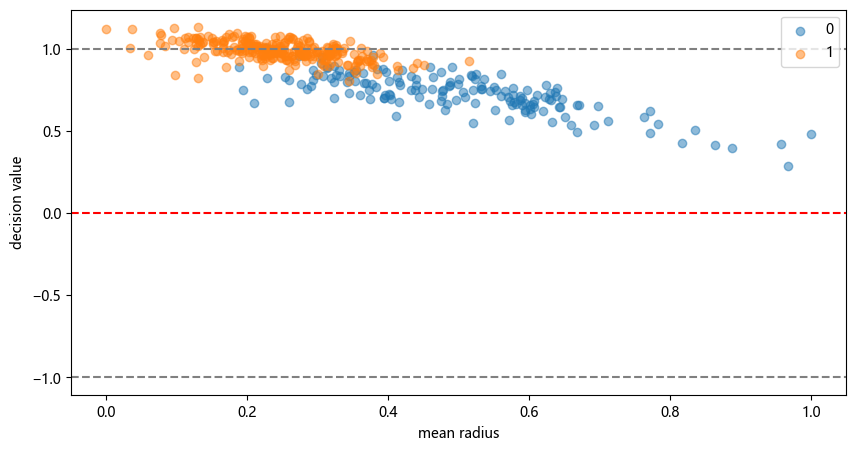

In [31]:
model4 = SVC(kernel="rbf", C=100, gamma=0.00001)
model4.fit(X_train_scaled, y_train)

print(f"Accuracy on training set: {accuracy_score(y_train, model4.predict(X_train_scaled) ) :.4f}")
print(f"    Accuracy on test set: {accuracy_score(y_test,  model4.predict(X_test_scaled) ) :.4f}")

plt.figure(figsize=(10, 5))
ax = plt.gca()
plot_decision_values(model4, X_train_scaled, y_train, 0, cancer.feature_names[0], ax=ax)

Accuracy on training set: 0.9836
    Accuracy on test set: 0.9650


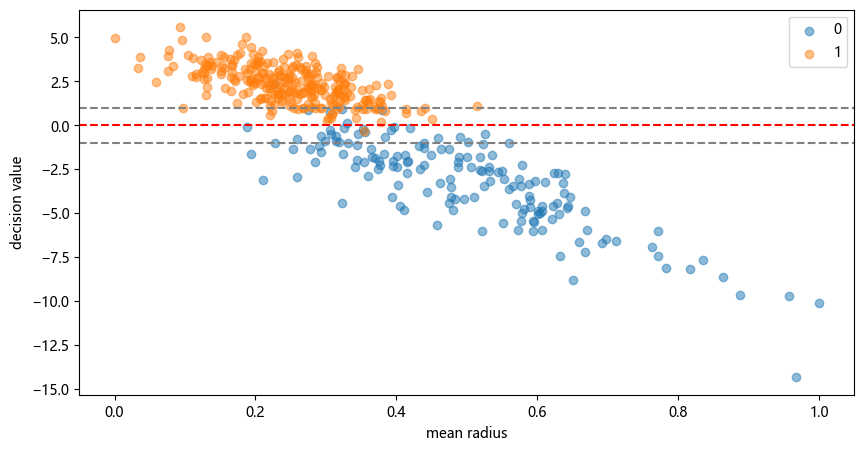

In [32]:
model4 = SVC(kernel="rbf", C=100000, gamma=0.00001)
model4.fit(X_train_scaled, y_train)

print(f"Accuracy on training set: {accuracy_score(y_train, model4.predict(X_train_scaled) ) :.4f}")
print(f"    Accuracy on test set: {accuracy_score(y_test,  model4.predict(X_test_scaled) ) :.4f}")

plt.figure(figsize=(10, 5))
plot_decision_values(model4, X_train_scaled, y_train, 0, cancer.feature_names[0])

Accuracy on training set: 0.9836
    Accuracy on test set: 0.9650


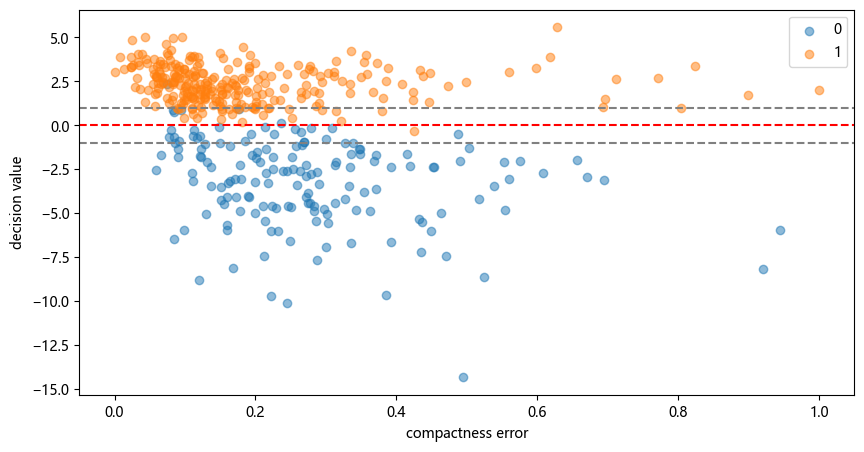

In [37]:
model4 = SVC(kernel="rbf", C=100000, gamma=0.00001)
model4.fit(X_train_scaled, y_train)

print(f"Accuracy on training set: {accuracy_score(y_train, model4.predict(X_train_scaled) ) :.4f}")
print(f"    Accuracy on test set: {accuracy_score(y_test,  model4.predict(X_test_scaled) ) :.4f}")

plt.figure(figsize=(10, 5))
plot_decision_values(model4, X_train_scaled, y_train, 15, cancer.feature_names[15])

# 支持向量机的优缺点


SVM训练计算复杂度一般是$\mathrm{O}\left(\max(n,d)\cdot \min(n,d)^2\right)$


## 优点 
1. 若数据是线性的，表现不错，即使高维情况向，效果也不错
1. 在核方法帮助下，可以解决复杂问题
1. 对孤立点表现不敏感


## 缺点
1. 选择核，不容易
2. 对于大量样本，结果表现不好
3. 超参数`C`、`gamma`调优，不容易，也难以可视化参数影响
